<a href="https://colab.research.google.com/github/Ayushmishra1503/Retail-sales-predication/blob/main/Retail_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Retails Sales prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team (The striving Minds)
##### **Team Member 1** -Ayush Mishra
##### **Team Member 2** - safaq khan
##### **Team Member 3 -** Sumit ojha

# **Project Summary -**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. My work includes various plots and graphs , visualizations , feature engineering , ensemble techniques , different ML algorithms with their respective parameter tuning , analysis and trends . Predictions are of 6 weeks of daily sales for 1,115 stores located across Germany.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Retail Sales Prediction is a regression machine learning project. Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  
from scipy.stats import shapiro 
from scipy.stats import spearmanr

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#importing model 
from sklearn.ensemble import RandomForestRegressor
     
# Import Libraries
# Import Libraries
import missingno as msno
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
     

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/Rossmann Stores Data.csv')

<ipython-input-2-2ef323c58438>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Rossmann Stores Data.csv')


In [ ]:
# Load Dataset "store"
df1 = pd.read_csv('/content/store (1).csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Dataset First Look of store dataset
df1.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df.shape

(1017209, 9)

### Dataset Rows & Columns count

In [ ]:

# Dataset Rows & Columns count
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
df1.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

### Dataset Information

In [ ]:
# Dataset Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
print(df1.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None


In [ ]:
# Dataset Rows & Columns count
print(df.shape)
print(df1.shape)

(1017209, 9)
(1115, 10)


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f"Number of duplicated rows in Rossmann dataset: {df.duplicated().sum()}")
print(f"Number of duplicated rows in Store dataset: {df1.duplicated().sum()}")

Number of duplicated rows in Rossmann dataset: 0
Number of duplicated rows in Store dataset: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
# Missing Values/Null Values Count
print(f"Number of null values rows in Rossmann dataset{df.isnull().sum()}")

Number of null values rows in Rossmann datasetStore            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [ ]:
# Missing Values/Null Values Count
print(f"Number of null values rows in store dataset{df1.isnull().sum()}")

Number of null values rows in store datasetStore                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


<AxesSubplot:>

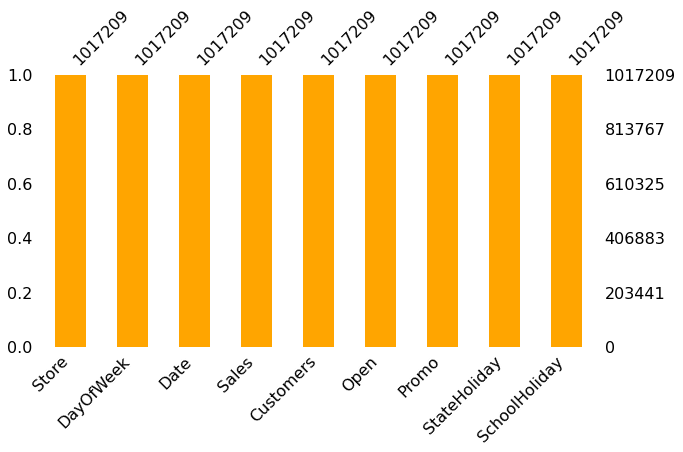

In [ ]:
# Visualizing the missing val# Visualizing the missing values
msno.bar(df,figsize=(10,5), color="orange")

<AxesSubplot:>

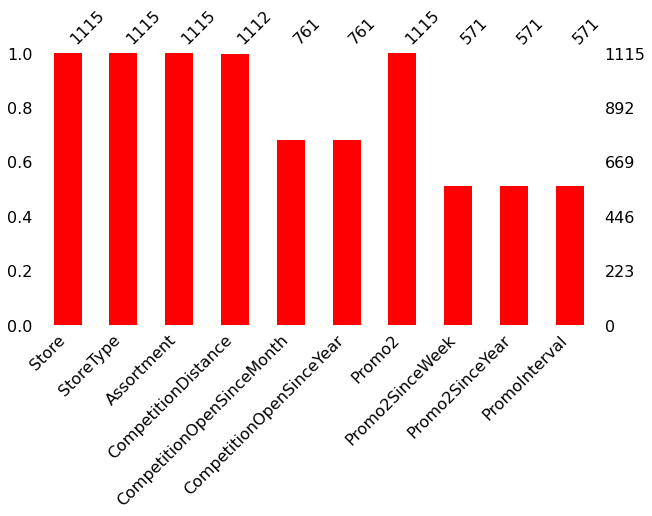

In [ ]:
# Visualizing the missing values
msno.bar(df1,figsize=(10,5), color="red")

### What did you know about your dataset?

Till now we get to know the following points about our dataset:

1.'Rossmann dataset' is having 1017209 rows and 9 columns and does not have any null value. 2.'Stores dataset' is having 1115 rows and 10 columns. It contains null values in total six features viz. CompetitionDistance,CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek,Promo2SinceYear and PromoInterval. 3.There are no duplicate values present in both the datasets. 4.There are total 4 categorical features in 'Rossmann' dataset namely Open, Promo, StateHoliday and SchoolHoliday and 'Stores' contain categorical features namely StoreType, Assortment, Promo2, PromoInterval.


Answer Here

### Data Set Loading of Store.csv

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Column names of Rossmann dataset is:\n{df.columns.tolist()}")
print(f"Column names of Store dataset is:\n{df1.columns.tolist()}")

Column names of Rossmann dataset is:
['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
Column names of Store dataset is:
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [ ]:
# Dataset Describe
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
df1.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


**Variables Description**

Rossmann Stores Data.csv - historical data including Sales

Store.csv - supplemental information about the stores

Data fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday.

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started a new. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("The Unique Values of', i, 'are:",df[i].unique())

The Unique Values of', i, 'are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of', i, 'are: [5 4 3 2 1 7 6]
The Unique Values of', i, 'are: ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-0

In [ ]:
for j in df1.columns.tolist():
  print("The Unique Values of', j, 'are:", df1[j].unique())

The Unique Values of', j, 'are: [   1    2    3 ... 1113 1114 1115]
The Unique Values of', j, 'are: ['c' 'a' 'd' 'b']
The Unique Values of', j, 'are: ['a' 'c' 'b']
The Unique Values of', j, 'are: [1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+03 2.840e+03
 5.540e+03 3.500e+02 2.050e+03 3.700e+03 2.256e+04 4.100e+02 2.500e+02
 1.130e+03 4.840e+03 1.750e+04 2.200e+03 1.650e+03 3.300e+02 2.244e+04
 1.996e+04 3.510e+03 3.320e+03 7.910e+03 2.370e+03 2.239e+04 2.710e+03
 1.181e+04 1.870e+03 4.

## 3. ***Data Wrangling***

### Data Wrangling Code

a). Handling null values from CompetitionDistance feature.

In [ ]:
# Write your code to make your dataset analysis ready.
df1[df1["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


<AxesSubplot:xlabel='CompetitionDistance'>

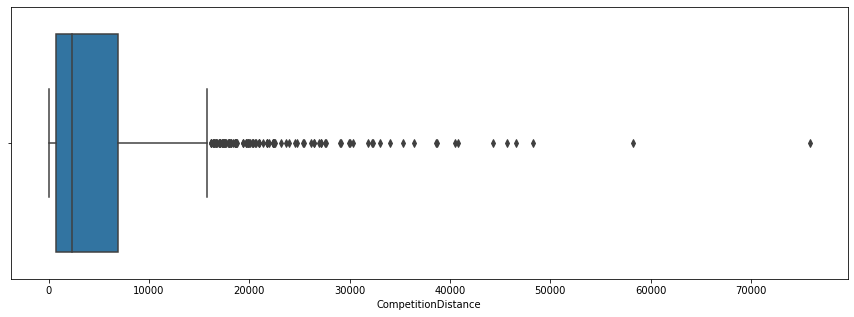

In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionDistance features
plt.figure(figsize=(15,5))
sns.boxplot(x= df1["CompetitionDistance"])

In [ ]:
# filling null values
df1["CompetitionDistance"].fillna(df1["CompetitionDistance"].median(), inplace=True)

In [ ]:
# rechecking if we have any further null values in CompetitionDistance feature
df1[df1["CompetitionDistance"].isnull()].sum()

Store                        0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
dtype: float64

b). Handling null values from CompetitionOpenSinceMonth and CompetitionOpenSinceYear feature

In [ ]:
# fetching the observations which contains null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear feature
df1[df1["CompetitionOpenSinceMonth"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompetitionOpenSinceMonth'>

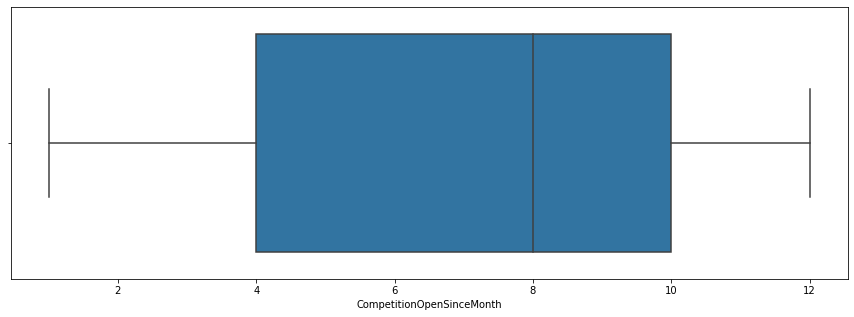

In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(df1["CompetitionOpenSinceMonth"])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompetitionOpenSinceYear'>

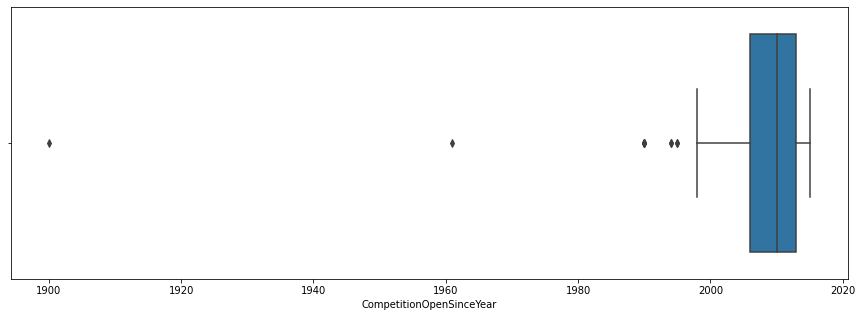

In [ ]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(df1["CompetitionOpenSinceYear"])

Filling null values of CompetitionOpenSinceMonth and CompetitionOpenSinceYear with Mode

In [ ]:
# filling null values of CompetitionOpenSinceMonth
df1["CompetitionOpenSinceMonth"].fillna(df1["CompetitionOpenSinceMonth"].mode()[0], inplace=True)

In [ ]:
#filling null values of CompetitionOpenSinceYear
df1["CompetitionOpenSinceYear"].fillna(df1["CompetitionOpenSinceYear"].mode()[0], inplace=True)

In [ ]:
# rechecking if we have any null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
# Replacing all the null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval with 0. 
df1["Promo2SinceWeek"].fillna(0, inplace=True)
df1["Promo2SinceYear"].fillna(0, inplace=True)
df1["PromoInterval"].fillna(0, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:

# rechecking if our features contains more null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Merge the Rossmann_df and Store_df csv by column 'Store' as in both csv Store column is common.

In [ ]:
# meregig the two dataset by using joins left, right, inner, outer and checking shape()
left_merge = pd.merge(df,df1, on='Store', how='left')
print(left_merge.shape)
right_merge = pd.merge(df,df1, on='Store', how='right')
print(right_merge.shape)
inner_merge = pd.merge(df,df1,on='Store', how='inner')
print(inner_merge.shape)
outer_merge = pd.merge(df,df1,on='Store',how='outer')
print(outer_merge.shape)

(1017209, 18)
(1017209, 18)
(1017209, 18)
(1017209, 18)


In [ ]:
#using left join for our further analysis
df2= left_merge
df2.shape


(1017209, 18)

In [ ]:
#checking info of our final merged dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

# 3. **Typecasting**

In [ ]:
# changing dtype into required format from both the datasets
df2["Date"]= pd.to_datetime(df2["Date"],format="%Y/%m/%d")
df2["CompetitionOpenSinceMonth"]= df2["CompetitionOpenSinceMonth"].astype(int)
df2["CompetitionOpenSinceYear"]= df2["CompetitionOpenSinceYear"].astype(int)
df2["Promo2SinceWeek"]= df2["Promo2SinceWeek"].astype(int)
df2["Promo2SinceYear"]= df2["Promo2SinceYear"].astype(int)

In [ ]:
# Verifying the dtypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
# checking the datatype 
df2.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,0,0,0


# What all manipulations have you done and insights you found?


In data wrangling we have divided it into three sections:

Null values treatment: In this section we have treated all the null values from both the datasets. We did the following replacements: a. Replaced null values of CompetitionDistance with MEDIAN.

b. Replaced null values of CompetitionOpenSinceMonth and with MODE.

c. Replaced null values of CompetitionOpenSinceYear and with MODE.

d. Replaced null values of Promo2SinceWeek and with 0.

e. Replaced null values of Promo2SinceYear and with 0.

f. Replaced null values of PromoInterval and with 0.

Merging datasets: We don't want to compromise with quality and quantity of our dataset in order to get the best accuracy in ML model implementation. So, we were wondering to use the best join for the good results and we got to know with our R&D that every join is giving the same shape of our merged dataset with 0 null values. So, we have decided to go with the inner join.

Typecasting: In typecasting section we have typecasted the following features in order to visualize it properly and can feed them as input of ML model:

a. Typecasted the Date feature to Datetime format.

b. Typecasted the CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear feature to Integer

# **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**


In order to visualize each chart properly we will do data visualization in a structured way following ' UBM ' rule:

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

1.Univariate Analysis

Categorical Data

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompetitionOpenSinceMonth', ylabel='count'>

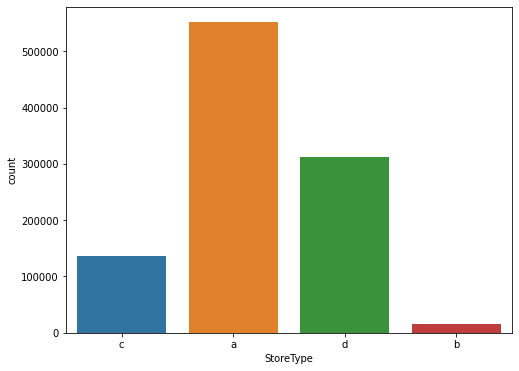

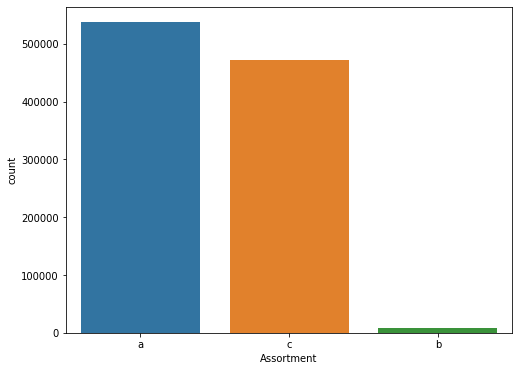

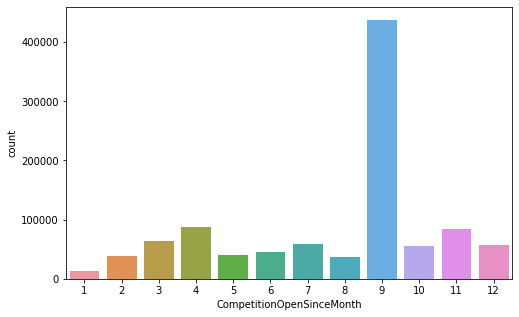

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(8,6))
sns.countplot(df2['StoreType']),

plt.figure(figsize=(8,6))
sns.countplot(df2['Assortment']),

plt.figure(figsize=(8,5))
sns.countplot(df2['CompetitionOpenSinceMonth'])

##### 1. Why did you pick the specific chart?

We plotted above graph to know the distribution of different type of stores,assortment,state holiday and promointerval in the dataset.

##### 2. What is/are the insight(s) found from the chart?

1.Store Type "a" is most common and Store Type "b" is rare in the dataset .

2.Most of the stores have assortment "a" and assortment "b" is very rare . Since there is significant diffference in the number of occurrence of different store types and assortments , it could indicate that certain store types and assortments are more successful or profitable than others .It could also suggest that certain store types and assortments are more suited to certain types of stores or locations.

3.We can infer that many stores are planning to get prmoted in first quarter of promointerval while number of stores getting promoted in successive quartes is decreasing gradually.Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since store type 'a','c' and 'd' are generating similar sales and lower than store type 'b', they can follow the business strategies, marketing tactics of store type 'b'.

#### Chart - 2
Sales Are nearly doubled High When Promo is Running

In [ ]:
df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

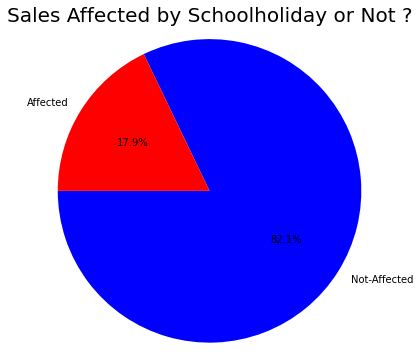

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = df2.SchoolHoliday.value_counts()
colors = ['blue', 'red']
explode = (0.1, 0.0)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

We choose the pie chart as it represents the contribution of school affected in data or not in the data to a whole where the arc size of each slice is directly proportional to the contribution of that part.

##### 2. What is/are the insight(s) found from the chart?

2.We see that 17.9 % afected and 82.1% are not  affected by school holiday  .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From above pie chart we understood that percentage of school holiday getting not more affected . sales are positively correlated to non holiday

#### Chart - 3

As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday

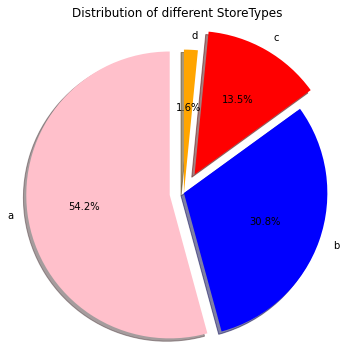

In [ ]:
# Chart - 4 visualization code
labels = 'a' , 'b' , 'c' , 'd'
sizes = df2.StoreType.value_counts()
colors = ['pink', 'blue' , 'red' , 'orange']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

##### 1. Why did you pick the specific chart?

We choose the pie chart as it represents the distribution of different store types.

##### 2. What is/are the insight(s) found from the chart?

we see that the distribution of stores as we represent with labels a is 54.2% , b is 16%,c is 13.5% d is 30.8% . 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since store type 'a','c' and 'd' are generating different sales and where 'a' is greater thn other store type, they can follow the business strategies, marketing tactics of store type 'a'

# Bivariate Analysis

 Chart  1

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customers', ylabel='Sales'>

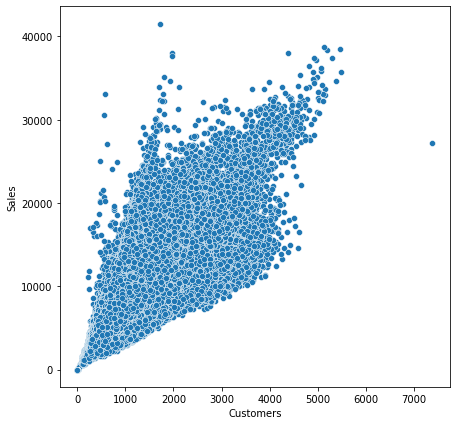

In [ ]:
# Chart - 1visualization code
# Sale Vs Customer
plt.figure(figsize=(7,7))
sns.scatterplot(df['Customers'],df['Sales'])

##### 1. Why did you pick the specific chart?

We chose scatter plot because we wanted to plot the relationship between the number of customers visiting the store and the total sales.They are useful for identifying outliers in the data, as well as to determine the correlation between two variables,and to verify the linear trend of our dataset.

##### 2. What is/are the insight(s) found from the chart?

This above scatterplot show a positive correlation between 'Sales' and 'Customers'. As the number of customers increases, the sales also tend to increase. We understood from the above trend that our data shows linear trend between these two variables - customers and sales

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Customers and sales are directly proportional to each other and are highly correlated. It can help businesses to promote their strategies using marketing campaigns, advertisements to attract more customers ultimately shooting up the sales

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

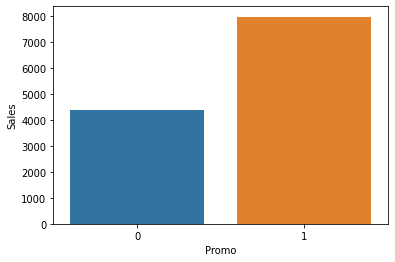

In [ ]:
 # Chart - 2 visualization code
Promo_sales = pd.DataFrame(df2.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

Checking stores with their assortment types

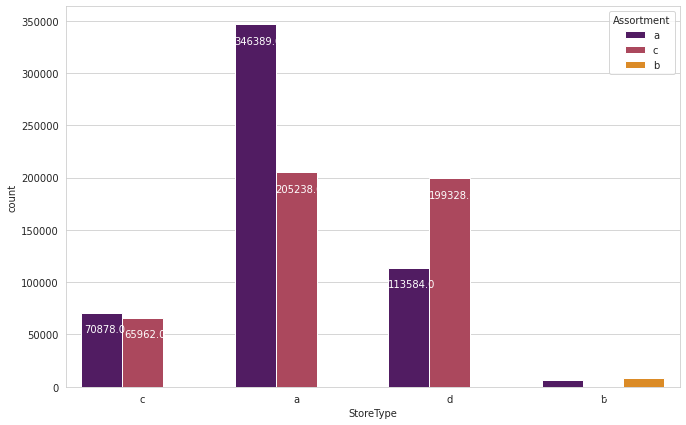

In [ ]:
# Chart - 3 visualisation code
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=df2,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

##### 1. Why did you pick the specific chart?

we choose the specific chart to know the Sales for various  Assortments 

##### 2. What is/are the insight(s) found from the chart?

Sales are highest for the assortment b . This assortment may have a good mix of products that are in high demand or that are unique to the store, which would result in more sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Since sales are highest for assortment 'b', Rossman owners can target more on this specific combination and reduce the dependency on assortment 'a' and assortment 'c'. This could surely be a cost effective move.

### chart-10

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompetitionDistance', ylabel='Sales'>

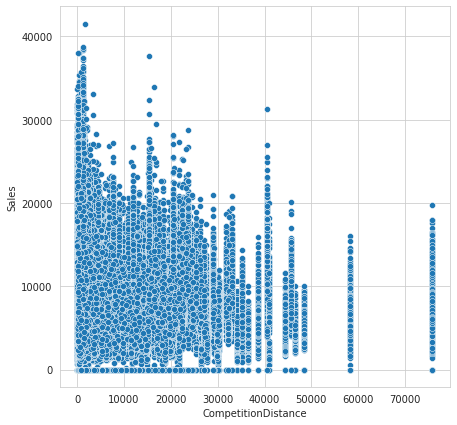

In [ ]:
# Sales Vs CompetitionDistance
plt.figure(figsize=(7,7))
sns.scatterplot(df2['CompetitionDistance'],df2['Sales'])

1. Why did you pick the specific chart?

To know the relationship between the sales and competition distance.

2. What is/are the insight(s) found from the chart?

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see sales are more for densely located stores.So, stores can continue providing exciting offers and services to attract customers to compete the market

Multivariate Analysis

 Chart - 1


<AxesSubplot:>

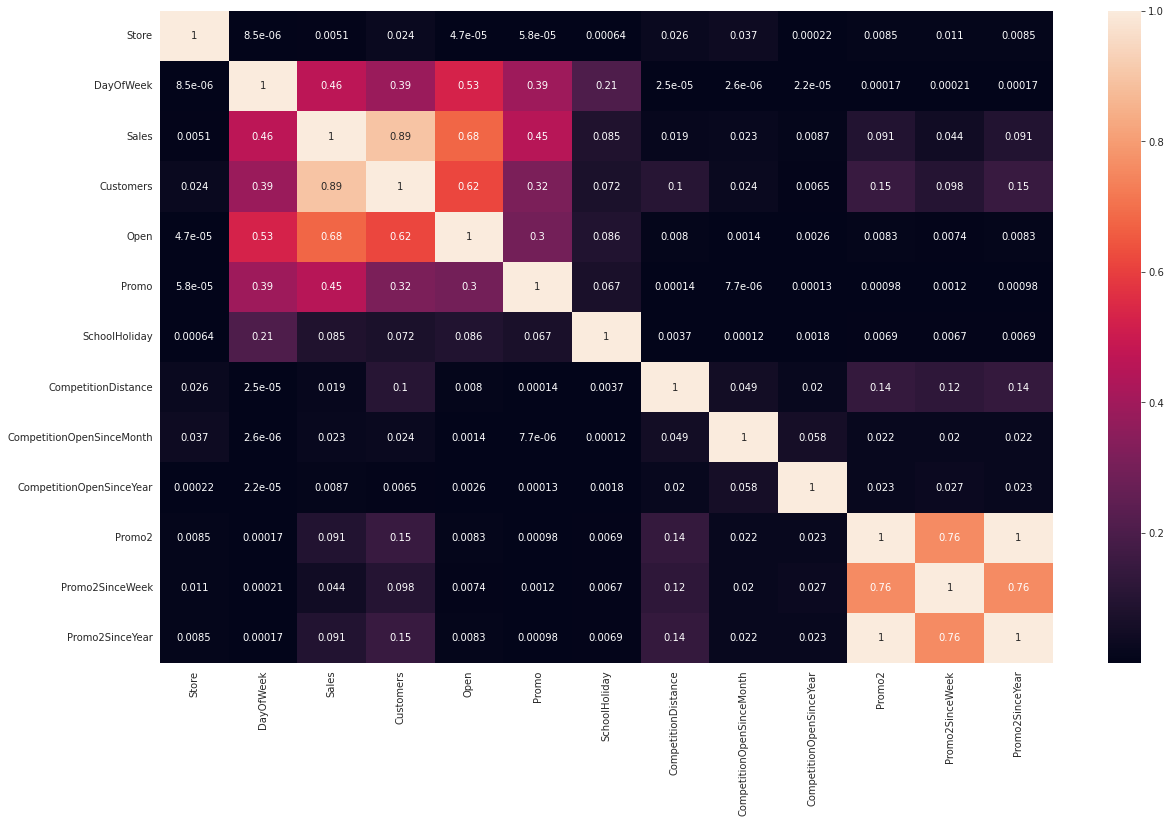

In [ ]:
# Chart - 1visualization code
plt.subplots(figsize=(20,12))
sns.heatmap(df2.corr().abs(), annot=True)


##### 1. Why did you pick the specific chart?

We wanted to check insights of correlation among every two features in the dataset so we choosen this chart(Heatmap).

##### 2. What is/are the insight(s) found from the chart?

some features like Cutomers, promo and SchoolHoliday are positively correlated with Sales. While others like DayofWeek, CompetitionDistance and promo2 are negatively correlated with Sales.Even we can state the correlation within any two independent features with the help of this chart(heatmap)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. As we can get which features are highly impacting to dependant variable i.e sales, we can focus on it to achieve max sales.

When the promo is running sales are high


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


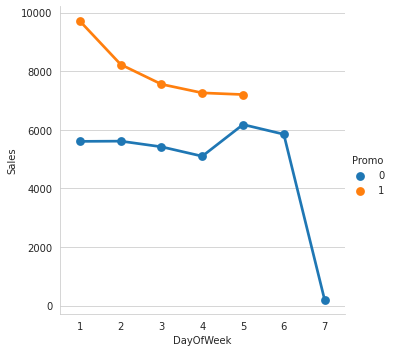

In [ ]:
# Chart - 2 visualization code
sns.factorplot(data = df2, x = "DayOfWeek", y = "Sales", hue = "Promo")

##### 1. Why did you pick the specific chart?

with the help of this factorplot el clearly saw that seventh day the sales is down


##### 2. What is/are the insight(s) found from the chart?

the insights from this chart we found that seven day sales is down 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

the gained insights created negative growth .because of the seven day sales and promo is much down.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

We have different statistical tests for different scenarios:

1. Single categorical feature -> One proportion test
2. Two categorical features -> Chi squared test
3. More than two category in categorical features -> ANOVA test
4. One numerical and one categorical(=2 categories) feature-> ANOVA test
5. One numerical feature -> T-test
6. Two numerical feature -> Corelation test
7. One numerical and one categorical(>2 categories) feature -> T-test
Let's just define three hypothetical statements and perform the needed tests for the same

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis - There is no relation between Customers and Sales

Alternate Hypothesis - There is a relationship between Customers and sales

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import pearsonr
first_sample = df2["Customers"].head(1500)
second_sample = df2["Sales"].head(1500)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')


stat=0.817, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data

##### Why did you choose the specific statistical test?

Statistical test provides a mechanism for making quantitative decisions about a process or processes. with the help of pearson corelation we found that mechanism is rejected null hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The null and alternative hypotheses are two competing claims that researchers weigh evidence for and against using a statistical test: Null hypothesis (H0): There's no effect in the Store . Alternative hypothesis (Ha or H1): There's an effect in the store.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
first_sample = df2["SchoolHoliday"].head(1000)
second_sample = df2["Sales"].head(1000)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.052, p = 0.10
Accept Null Hypothesis


##### Which statistical test have you done to obtain P-Value?


We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

Statistical test provides a mechanism for making quantitative decisions about a process or processes. with the help of pearson correlation we found that mechanism is accept null hypothesis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The null and alternative hypotheses are two competing claims that researchers weigh evidence for and against using a statistical test: Null hypothesis (H0): There's no effect in the store and sales . Alternative hypothesis (Ha or H1): There's an effect in the store and sales.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
first_sample = df2["DayOfWeek"].head(2500)
second_sample = df2["Sales"].head(2500)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')


stat=0.204, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

Statistical test provides a mechanism for making quantitative decisions about a process or processes. with the help of pearson correlation we found that mechanism is rejected null hypothesis.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df2.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

What all missing value imputation techniques have you used and why did you use those techniques?

As we have already treated null values so we do not have any more missing/null/duplicate values in our dataset and our dataset is good to go.

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
# assigning continous variable features in new variables so that it makes sense while visulatizing through box plots
continous_value_feature= ["DayOfWeek", "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
categorical_features= ["Date", "StoreType", "Assortment", "PromoInterval"]
print("Numeric_features: ",numeric_features)
print("Categorical_features: ",categorical_features)
print("Continous_value_feature:")

Numeric_features:  ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']
Categorical_features:  ['Date', 'StoreType', 'Assortment', 'PromoInterval']
Continous_value_feature:


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

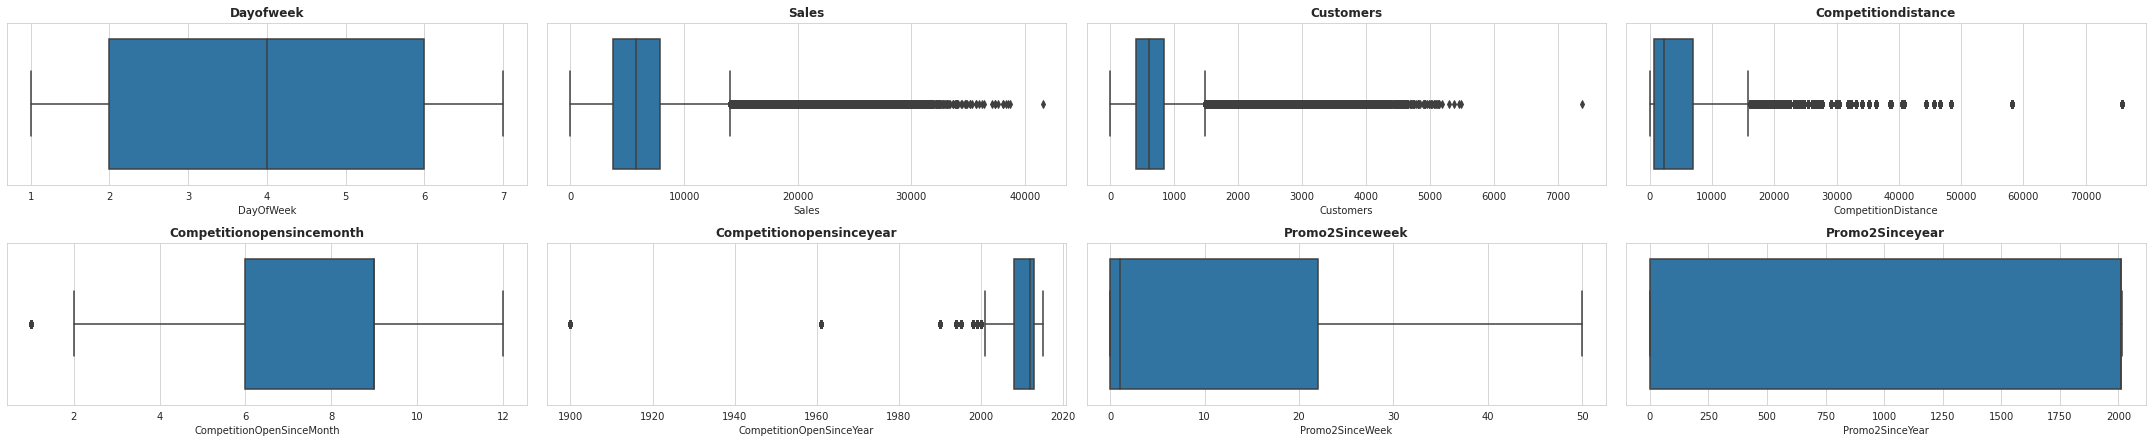

In [ ]:
# checking outliers with the help of box plot for continous features
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_value_feature):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df2[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

From the above box plots we can see clearly the features "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" contains several outliers and rest of the features are fine as they are categorical in nature.

Let's define a code to detect the number of outliers and percentage of outliers present in each of the feature in order to handle them accordingly.

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continous_value_feature:
  print(feature,":")
  detect_outliers(df2[feature])
  print("\n")

DayOfWeek :
q1:2.0, q2:4.0, q3:6.0
Lower bound: -4.0, Upper bound: 12.0, IQR: 4.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:3727.0, q2:5744.0, q3:7856.0
Lower bound: -2466.5, Upper bound: 14049.5, IQR: 4129.0
Total number of outliers are: 26694
Total percentage of outlier is: 2.62 %


Customers :
q1:405.0, q2:609.0, q3:837.0
Lower bound: -243.0, Upper bound: 1485.0, IQR: 432.0
Total number of outliers are: 38095
Total percentage of outlier is: 3.75 %


CompetitionDistance :
q1:710.0, q2:2325.0, q3:6880.0
Lower bound: -8545.0, Upper bound: 16135.0, IQR: 6170.0
Total number of outliers are: 99160
Total percentage of outlier is: 9.75 %


CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 12452
Total percentage of outlier is: 1.22 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 27

Below mentioned continous features with the percentage of outliers:

"Sales" - 2.62% "Customers" - 3.75% "CompetitionDistance" - 9.75% "CompetitionOpenSinceMonth" - 1.22% "CompetitionOpenSinceYear" - 2.71% Let's define a function for the outlier treatment using IQR technique and cap the outliers in 25-75 percentile.

In [ ]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]
    
    return treated_data_int

In [ ]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continous_value_feature:
  df2[feature]= treat_outliers_iqr(df2[feature])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

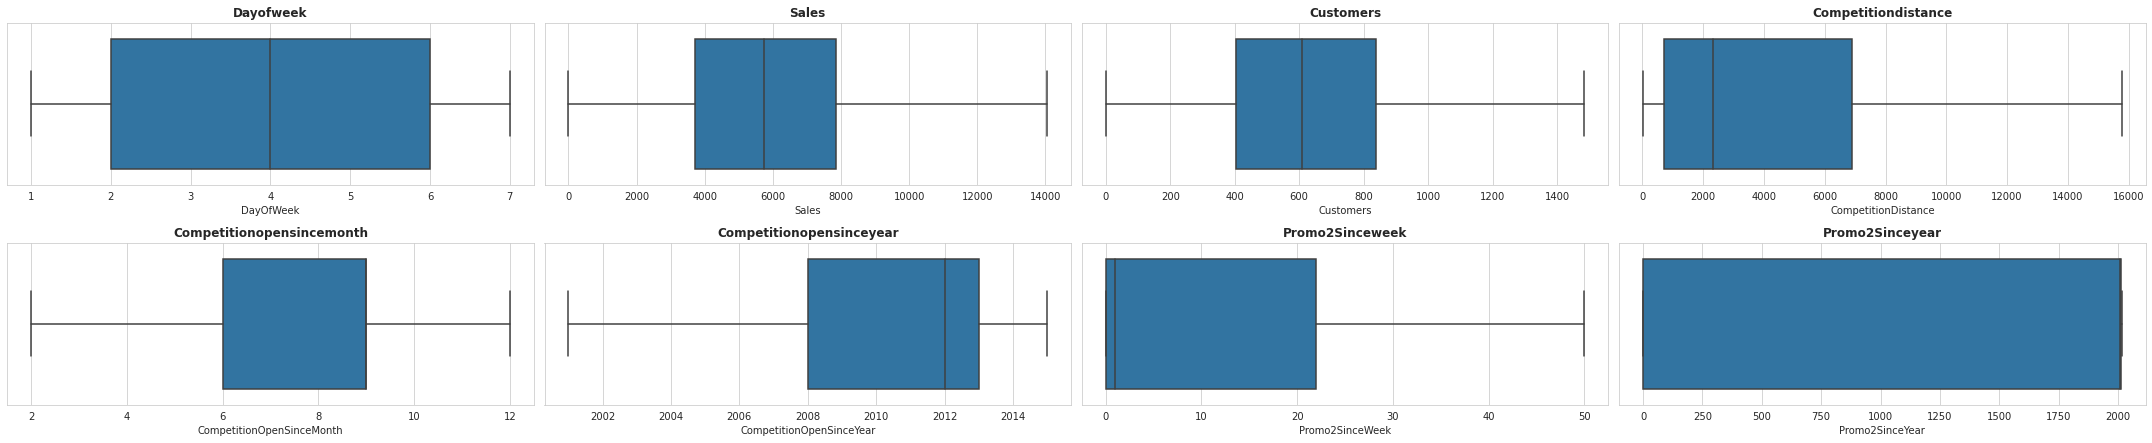

In [ ]:
#Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_value_feature):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df2[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

### 3. Categorical Encoding

In [ ]:
# checking the features having dtype as object
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

Clearly we have "StoreType", "Assortment", "PromoInterval" "SateHoliday" as "object". To feed them as an input of our Machine Learning algorithm, we need to use some encoding technique to make dtype of these column as "integer".

In [ ]:
# creating the variable that contains list of "object" dtypes
data_tpye_obj= ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]

In [ ]:
# checking the unique counts of object dype column which is essential to determine the type of encoding to use in various column
for unique in data_tpye_obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df2[unique].unique()}")
  print(f"Total number of unique values are: {df2[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: ['0' 'a' 'b' 'c' 0]
Total number of unique values are: 5


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




In [ ]:
# replacing "0" to 0 and a=b=c=1 for our simplicity as they resembles that there is holiday
df2["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)

In [ ]:
# rechecking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in data_tpye_obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df2[unique].unique()}")
  print(f"Total number of unique values are: {df2[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: [0 1]
Total number of unique values are: 2


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




Since we have several encoding techniques but the major ones are:

1.Ordinal encoding: Used when the features are ordinal in nature and have some rank between them.

2.Nominal encoding: Used when the features have equal weightage and are nominal in nature.

As our all the categorical columns are nominal in nature(do not have any rank or order) so will use One-Hot Encoding (Type of Nominal encoding) in our senario:

In [ ]:
#Lets create a copy of dataframe to avoid blunders with our original dataframe
df_new=df2.copy() 

We can use the above code to create binary dummy variable using ONE-HOT ENCODING for each of the feature but we will face the issue of "multicollinearity" or "dummy variable trap" as the information given by the one feature can be explained by the other features and this results in the high "VIF". So its better to drop the redundant feature (one category among all other category) here only.

We can do this easily by passing the argument "drop_first = True" in get_dummies without doing it manually, thanks to python code development team to make our tasks easier.

In [ ]:
# Encode your categorical columns by dropping the first category
df_new= pd.get_dummies(df2, dtype=int, drop_first=True)

In [ ]:
# Let's see first five observations of our dataset
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,...,Promo2SinceWeek,Promo2SinceYear,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,1270,...,0,0,0,1,0,0,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,570,...,13,2010,0,0,0,0,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,14130,...,14,2011,0,0,0,0,0,0,1,0
3,4,5,2015-07-31,13995,837,1,1,0,1,620,...,0,0,0,1,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,6880,...,0,0,0,0,0,0,0,0,0,0


### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

We don't have textual data in any of the feature so it is not needed for our project

#### 1. Expand Contraction

In [ ]:

# Expand Contraction
## We don't have textual data in any of the feature so it is not needed for our project

#### 2. Lower Casing

In [ ]:
# Lower Casing
## We don't have textual data in any of the feature so it is not needed for our project

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
## We don't have textual data in any of the feature so it is not needed for our project

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits
## We don't have textual data in any of the feature so it is not needed for our project

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
## We don't have textual data in any of the feature so it is not needed for our project

In [ ]:
# Remove White spaces
## We don't have textual data in any of the feature so it is not needed for our project

#### 6. Rephrase Text

In [ ]:
# Rephrase Text
## We don't have textual data in any of the feature so it is not needed for our project

#### 7. Tokenization

In [ ]:
# Tokenization
## We don't have textual data in any of the feature so it is not needed for our project

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
## We don't have textual data in any of the feature so it is not needed for our project

#### 9. Part of speech tagging

In [ ]:
# POS Taging
## We don't have textual data in any of the feature so it is not needed for our project

#### 10. Text Vectorization

In [ ]:

# Vectorizing Text
## We don't have textual data in any of the feature so it is not needed for our project

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Stores are closed, they won't generate sales, so we will remove that part of the dataset
df2 = df2[df2.Open != 0]

In [ ]:
# Extracting date, month and year from Date feature
df2[df2.Sales == 0]['Store'].sum()

31460

In [ ]:
df2[df2.Sales == 0]['Sales'].sum()/df2.Sales.sum()

0.0

In [ ]:
# remove this part of data to avoid bias
df2 = df2[df2.Sales != 0]

In [ ]:
df2_new=df2.copy()

In [ ]:
df2_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270,9,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,837,1,1,0,1,c,c,620,9,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,6880,4,2015,0,0,0,0


In [ ]:
df2_new.shape

(844338, 18)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
X = df2_new.iloc[:,[1,4]]
y= df2_new.Sales

What all feature selection methods have you used and why?

Using Lasso regression for feature selection.

##### Which all features you found important and why?

We have selected "DayOfWeek","Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration" as our final features as they are highly corelated with the target variable (Sales) and no two features are providing the same information.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
for i in df2.columns:
  print(f"The number of unique counts in feature {i} is: {df2[i].nunique()}")

The number of unique counts in feature Store is: 1115
The number of unique counts in feature DayOfWeek is: 7
The number of unique counts in feature Date is: 942
The number of unique counts in feature Sales is: 13193
The number of unique counts in feature Customers is: 1421
The number of unique counts in feature Open is: 1
The number of unique counts in feature Promo is: 2
The number of unique counts in feature StateHoliday is: 2
The number of unique counts in feature SchoolHoliday is: 2
The number of unique counts in feature StoreType is: 4
The number of unique counts in feature Assortment is: 3
The number of unique counts in feature CompetitionDistance is: 555
The number of unique counts in feature CompetitionOpenSinceMonth is: 11
The number of unique counts in feature CompetitionOpenSinceYear is: 15
The number of unique counts in feature Promo2 is: 2
The number of unique counts in feature Promo2SinceWeek is: 25
The number of unique counts in feature Promo2SinceYear is: 8
The number o

### 6. Data Scaling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Scaling your data
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
scaler.transform(X_train)
X_train_scaled = scaler.transform(X_train) 
scaler = MinMaxScaler().fit(X_test)
scaler.transform(X_test)
X_test_scaled = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

We have used minmax Scaler of sklearn library to scale our data. This is important for us, as features on different scales can lead to poor performance or slow convergence. Standardizing the features also makes it easier to compare different features or observe the effect of a feature on the target variable("Sales") by comparing the magnitude of its coefficient. Additionally, we are going to apply linear regression model for which having normally distributed data is the statistical assumption of the model, which standardization can help enforce

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:

# DImensionality Reduction (If needed)
## Not needed for now

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
columns=X_train.columns
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(591036, 2)
(253302, 2)
(591036,)
(253302,)


In [ ]:
df2_exp = X_train
df2_exp

,DayOfWeek,Customers
624183,4,743
1012679,6,622
827771,3,694
121596,1,981
199190,2,764
...,...,...
431417,2,837
183531,2,1302
143646,3,679
526027,1,1124


##### What data splitting ratio have you used and why? 

Since our dataset is huge and have nearly 10lakh obsevations. So, We have assigned 80% data into train set and 20% into the test set with random_state=0 so that we do not get different observations in every split.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:

# Handling Imbalanced Dataset (If needed)
# We have alreay excluded the closed stores for which the sales are 0. So, we do not have any imabalanced data with us.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Not needed

## ***7. ML Model Implementation***

In [ ]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)  
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

1802.1021902875227

In [ ]:
regressor.coef_

array([ -586.03511139, 10786.08499789])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1551.2630899102487

In [ ]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.5966056638274116

In [ ]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.5956611401217644

In [ ]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred})

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

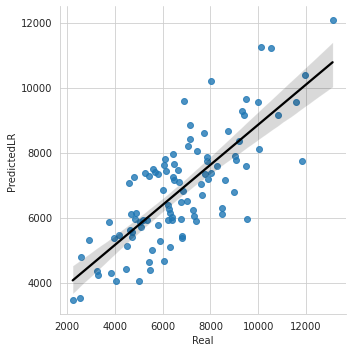

In [ ]:

#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

# 2. Cross- Validation & Hyperparameter Tuning

Machine learning is an iterative process.You will face choices about predictive variables to use, what types of models to use,what arguments to supply those models, etc. We make these choices in a data-driven way by measuring model quality of various alternatives. You've already learned to use train_test_split to split the data, so you can measure model quality on the test data. Cross-validation extends this approach to model scoring (or "model validation.") Compared to train_test_split, cross-validation gives you a more reliable measure of your model's quality, though it takes longer to run.

# The Cross-Validation Procedure

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. For example, we could have 5 folds or experiments. We divide the data into 5 pieces, each being 20% of the full dataset.

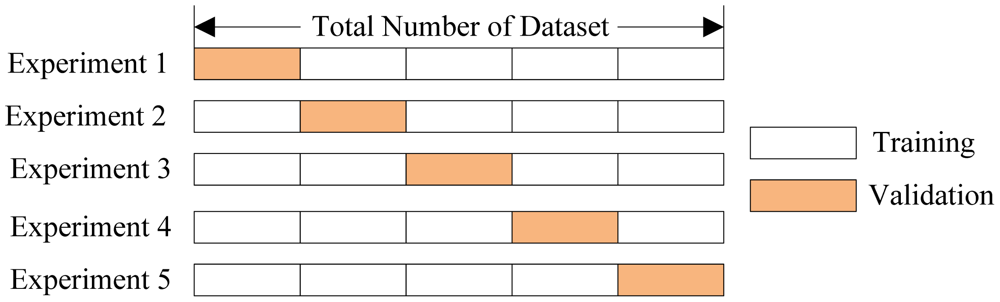

We run an experiment called experiment 1 which uses the first fold as a holdout set, and everything else as training data. This gives us a measure of model quality based on a 20% holdout set, much as we got from using the simple train-test split.
We then run a second experiment, where we hold out data from the second fold (using everything except the 2nd fold for training the model.) This gives us a second estimate of model quality. We repeat this process, using every fold once as the holdout. Putting this together, 100% of the data is used as a holdout at some point.
Returning to our example above from train-test split, if we have 5000 rows of data, we end up with a measure of model quality based on 5000 rows of holdout (even if we don't use all 5000 rows simultaneously.

# Trade-offs Between Cross-Validation and Train-Test Split

Cross-validation gives a more accurate measure of model quality, which is especially important if you are making a lot of modeling decisions. However, it can take more time to run, because it estimates models once for each fold. So it is doing more total work.
Given these tradeoffs, when should you use each approach? On small datasets, the extra computational burden of running cross-validation isn't a big deal. These are also the problems where model quality scores would be least reliable with train-test split. So, if your dataset is smaller, you should run cross-validation.
For the same reasons, a simple train-test split is sufficient for larger datasets. It will run faster, and you may have enough data that there's little need to re-use some of it for holdout.
There's no simple threshold for what constitutes a large vs small dataset. If your model takes a couple minute or less to run, it's probably worth switching to cross-validation. If your model takes much longer to run, cross-validation may slow down your workflow more than it's worth.
Alternatively, you can run cross-validation and see if the scores for each experiment seem close. If each experiment gives the same results, train-test split is probably sufficient.

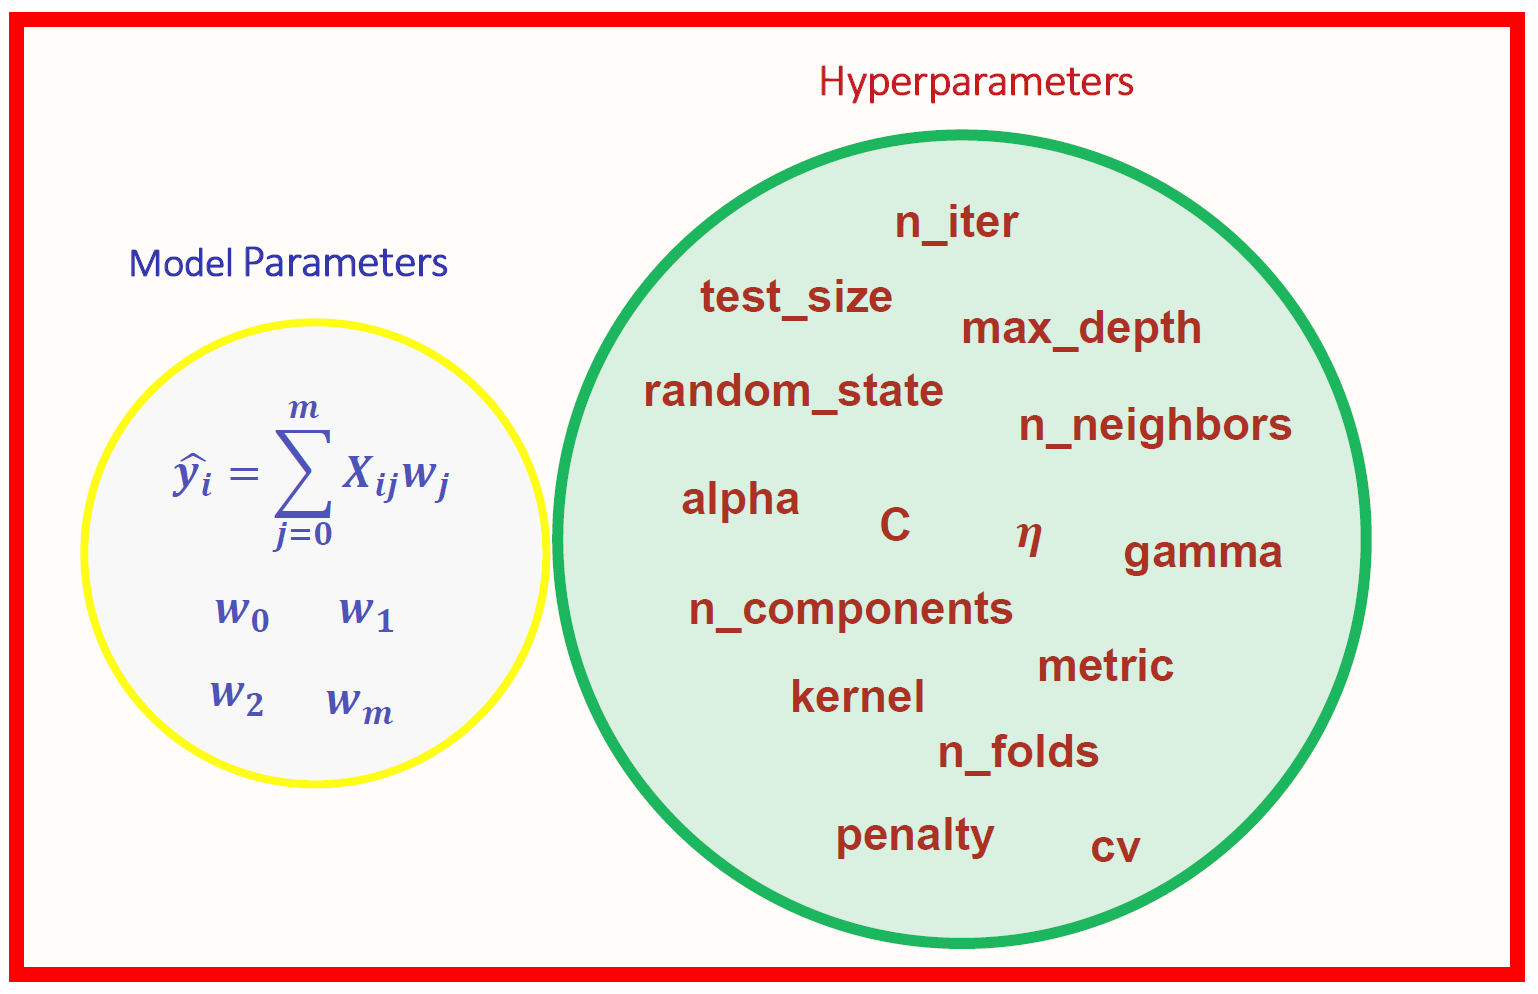

### ML Model - 2

# Implementing Elastic net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [ ]:
elasticnet.score(X_train, y_train)

0.3695109469649196

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 3759015.244888134
RMSE : 1938.8180020022853
R2 : 0.36839050405292995
Adjusted R2 :  0.3683855169862936


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

After simple LR models, we tried 'Decision Tree' and we saw a good increment in the r2 score from 0.75 to 0.90 that means "90% Variance of our test dataset is captured by our trained model" which is excellent. On the other side our RMSE also decreased and shifted below 5(=4.7) which is very good.Also accuracy increased from 93% to 95%. On the other hand from the residual plot our values of mean and median are shifting towards 0 that means our model is improving. But, in the quest of more accurate and real predictions, we decided to further tune the hyperparameters and check the results.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,],'l1_ratio':[0.3,0.4,0.5,0.6,]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.663e+11, tolerance: 2.813e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.665e+11, tolerance: 2.814e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.637e+11, tolerance: 2.806e+08

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6]},
             scoring='neg_mean_squared_error')

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-08, 'l1_ratio': 0.3}

Using  {'alpha': 1e-08, 'l1_ratio': 0.3}  the negative mean squared error is:  -2397769.929283128


In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2406417.1783696017
RMSE : 1551.2630912806512
R2 : 0.5956611394073699
Adjusted R2 :  0.5956579468257917


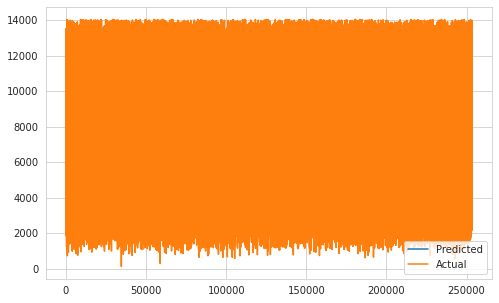

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We have used different combinations of parameters to get the best value of r2 score and least MAPE for our case. The best combination was found out to be {'max_depth': 18, 'min_samples_leaf': 7, 'min_samples_split': 4} which resulted into the improvement in the MSE from 22% to 19% on the test set. Also MAPE is further reduced from 4% to 3% and capturing variance 1% more i.e 91% of the test dataset. At this point of time we have achieved above 95% (=96.30%) accuracy by hyperparameter tuning of Decision trees.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In order to minimise the errors between actual and predicted values, we evaluate our ML model using different metrics. All these metrics try to give us an indication on how close we are with the real/expected output. In our case, each evaluation metric is showing not much difference on the train and test data which shows that our model is predicting a closer expected value. So the sales, the dependent variable, which impacts the business is getting accurately predicted to the extent of ~96% and ~3% far from the mean of actual absolute values.

### ML Model - 3

In [ ]:
#Lasso regression

In [ ]:
# ML Model - 3 Implementation
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.5966055950893188

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2406424.739811123
RMSE : 1551.2655284673617
R2 : 0.5956598688942283
Adjusted R2 :  0.5956566763026183


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.735e+11, tolerance: 2.350e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.678e+11, tolerance: 2.336e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.684e+11, tolerance: 2.340e+08

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -2397776.647341126


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

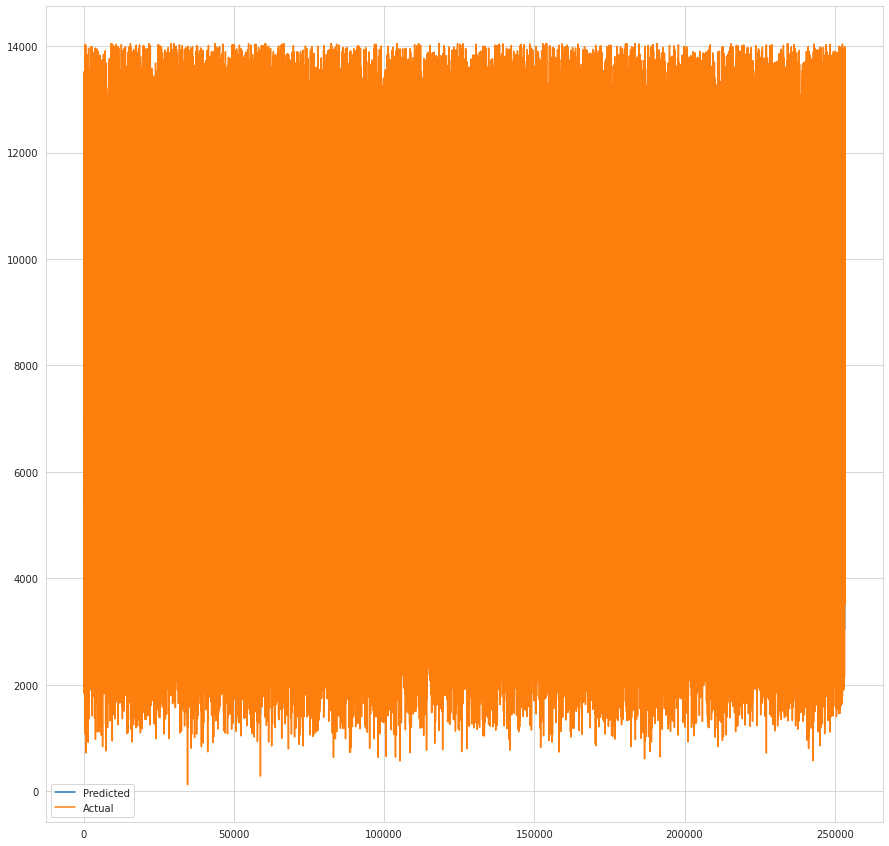

In [ ]:
plt.figure(figsize=(15,15))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 2406417.174117892
RMSE : 1551.2630899102487
R2 : 0.5956611401217644
Adjusted R2 :  0.5956579475401917


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In order to minimise the errors between actual and predicted values, we evaluate our ML model using different metrics. All these metrics try to give us an indication on how close we are with the real/expected output. In our case, each evaluation metric is showing not much difference on the train and test data which shows that our model is predicting a closer expected value. So the sales, the dependent variable, which impacts the business is getting accurately predicted to the extent of ~96% and ~3% far from the mean of actual absolute values.

# **Conclusion**

Conclusion and Recommendations
Conclusion

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:
1. there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
2. The positive effect of promotion on Customers and Sales is observable.
Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
Store type B though being few in number had the highest sales average.
3.  The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
The outliers in the dataset showed justifiable behaviour.
4. The outliers were either of store type b or had promotion going on which increased sales.
Random Forest Tuned Model gave the best results and only 0.021% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***